In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_labels.npy
/kaggle/input/fer2013-faceexpressrecognition2013-in-array/test_labels.npy
/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_images.npy
/kaggle/input/fer2013-faceexpressrecognition2013-in-array/test_images.npy


In [2]:
training_images = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_images.npy")
training_labels = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_labels.npy")
testing_images = np.load ("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/test_images.npy")
test_labels = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/test_labels.npy")

In [3]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(test_labels.shape)

(28709, 48, 48)
(28709,)
(7178, 48, 48)
(7178,)


In [4]:
label_names = ['','angry','disgust','fear','happy','neutral','sad','surprise']

In [5]:
pip install plt

ERROR: Could not find a version that satisfies the requirement plt (from versions: none)
ERROR: No matching distribution found for plt
^C
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt

label =  happy


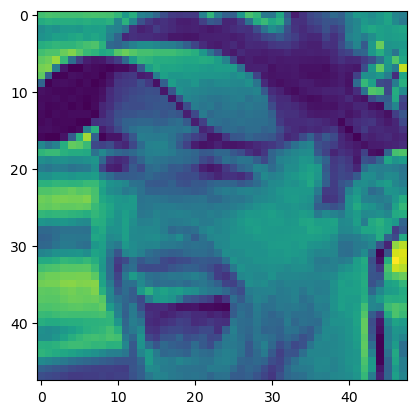

In [7]:
plt.imshow(training_images[14000])
print("label = ",label_names[training_labels[14000]])

label =  angry


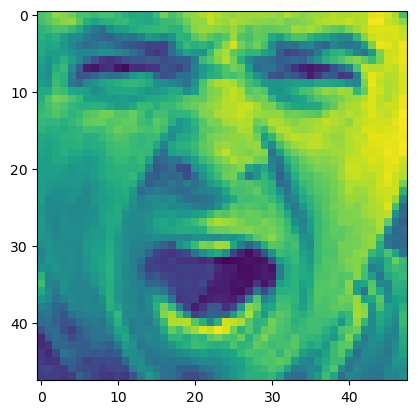

In [8]:
plt.imshow(training_images[1400])
print("label = ",label_names[training_labels[1400]])

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming your image data has the shape (height, width, channels)
image_height = 28
image_width = 28
num_channels = 1

# Assuming the number of classes (output categories) in your dataset
num_classes = 10

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the data
training_images = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_images.npy")
training_labels = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_labels.npy")
testing_images = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/test_images.npy")
test_labels = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/test_labels.npy")

# Normalize the images to values between 0 and 1
training_images = training_images / 255.0
testing_images = testing_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes for the emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the training and testing data to include a single channel (grayscale)
training_images = training_images.reshape(training_images.shape[0], 48, 48, 1)
testing_images = testing_images.reshape(testing_images.shape[0], 48, 48, 1)

# Ensure that the label values are within the valid range [0, 6]
training_labels = np.clip(training_labels, 0, 6)
test_labels = np.clip(test_labels, 0, 6)

# Train the model
model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testing_images, test_labels)
print("Test accuracy:", test_accuracy)

Epoch 1/5
718/718 [==============================] - 48s 65ms/step - loss: 1.4925 - accuracy: 0.3908 - val_loss: 2.5718 - val_accuracy: 0.0000e+00
Epoch 2/5
718/718 [==============================] - 46s 64ms/step - loss: 1.2728 - accuracy: 0.5038 - val_loss: 2.4092 - val_accuracy: 0.0124
Epoch 3/5
718/718 [==============================] - 46s 63ms/step - loss: 1.1715 - accuracy: 0.5460 - val_loss: 2.3387 - val_accuracy: 0.0313
Epoch 4/5
718/718 [==============================] - 46s 64ms/step - loss: 1.1024 - accuracy: 0.5769 - val_loss: 2.5800 - val_accuracy: 0.0484
Epoch 5/5
225/225 [==============================] - 4s 17ms/step - loss: 1.5112 - accuracy: 0.4620
Test accuracy: 0.4619671106338501


In [13]:
model.save(r"C:\Users\pc\Downloads\emotion_detection_model.h5")

# Print a message indicating that the model has been saved
print("Model saved successfully.")

Model saved successfully.


898/898 [==============================] - 15s 16ms/step - loss: 2.0820 - accuracy: 0.3387
Test Accuracy: 0.33870911598205566
898/898 [==============================] - 15s 17ms/step


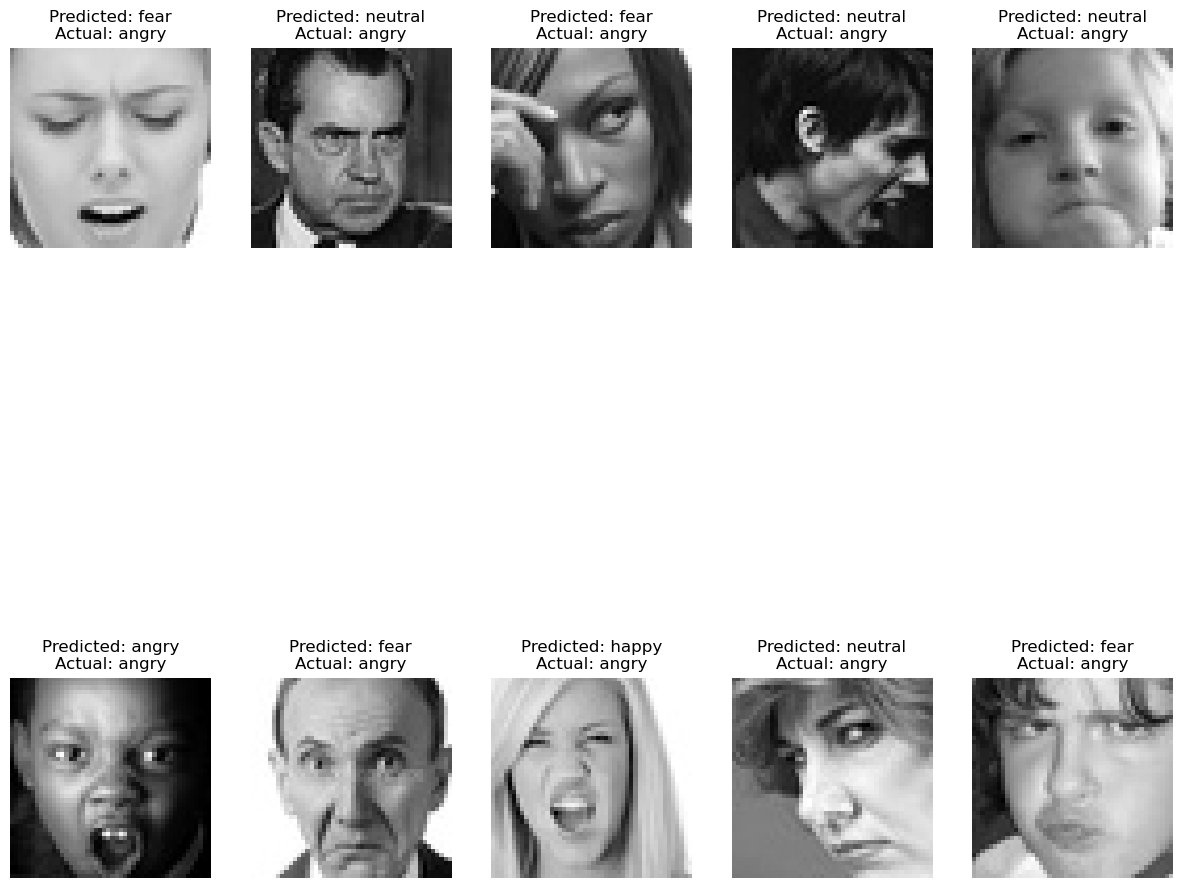

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the test data (if not already loaded)
testing_images = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_images.npy")
test_labels = np.load("/kaggle/input/fer2013-faceexpressrecognition2013-in-array/train_labels.npy")

# Normalize the images to values between 0 and 1
testing_images = testing_images / 255.0

# Reshape the testing data to include a single channel (grayscale)
testing_images = testing_images.reshape(testing_images.shape[0], 48, 48, 1)

# Ensure that the label values are within the valid range [0, 6]
test_labels = np.clip(test_labels, 0, 3)

# Load the trained model
loaded_model = load_model(r"C:\Users\pc\Downloads\emotion_detection_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(testing_images, test_labels)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predicted_labels = loaded_model.predict(testing_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Label names for emotions
label_names = ['', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Visualize some predictions
num_samples_to_visualize = 10
plt.figure(figsize=(15, 15))
for i in range(num_samples_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(testing_images[i].reshape(48, 48), cmap='gray')
    predicted_label = label_names[predicted_classes[i]]
    actual_label = label_names[test_labels[i]]
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
plt.show()

In [17]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, grayscale=True, target_size=(48, 48))
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap='gray')
    plt.show()
# convert to array
    img = img_to_array(img)
# reshape into a single sample with 1 channel
    img = img.reshape(1, 48, 48, 1)
# prepare pixel data
    img = img.astype('float64')
    img = img / 255.0
    return img
# load an image and predict the class
def run_example():
# load the image
    img = load_image(r"C:\Users\pc\Downloads\1.png")
# load model
    model = load_model(r"C:\Users\pc\Downloads\emotion_detection_model.h5")
# predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print('Predicted',digit)
# entry point, run the example
run_example()

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py)

In [18]:
from keras.preprocessing.image import load_img

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py)